In [1]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_predict,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,accuracy_score

In [2]:
na_values = ['unknown']
df = pd.read_csv('bank-full.csv',na_values=na_values,keep_default_na=False)

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
subscribed = df['y'] == 'yes'
not_subscribed = df['y'] == 'no'
subscription_percentage = (len(df.loc[subscribed])/len(df['y']))*100
subscription_percentage

11.698480458295547

In [7]:
df_subscribed = df[subscribed]
df_not_subscribed = df[not_subscribed]
df_not_subscribed = df_not_subscribed.sample(frac=0.132,random_state=42)

In [8]:
frames = [df_subscribed,df_not_subscribed]
df = pd.concat(frames)

In [9]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,NaN,5,may,1042,1,-1,0,NaN,yes
86,56,admin.,married,secondary,no,45,no,no,NaN,5,may,1467,1,-1,0,NaN,yes
87,41,technician,married,secondary,no,1270,yes,no,NaN,5,may,1389,1,-1,0,NaN,yes
129,55,services,married,secondary,no,2476,yes,no,NaN,5,may,579,1,-1,0,NaN,yes
168,54,admin.,married,tertiary,no,184,no,no,NaN,5,may,673,2,-1,0,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9325,48,entrepreneur,single,tertiary,no,2313,no,no,NaN,6,jun,130,1,-1,0,NaN,no
5330,36,admin.,married,secondary,no,-118,yes,yes,NaN,23,may,263,2,-1,0,NaN,no
20234,60,management,single,tertiary,no,2190,no,no,cellular,11,aug,601,2,-1,0,NaN,no
7640,34,services,married,secondary,no,457,yes,no,NaN,30,may,67,2,-1,0,NaN,no


In [10]:
subscribed = df['y'] == 'yes'
not_subscribed = df['y'] == 'no'
subscription_percentage = (len(df.loc[subscribed])/len(df['y']))*100
subscription_percentage

50.0899706411592

In [11]:
df = df.sample(frac=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
44688,83,housemaid,married,primary,no,2140,no,no,cellular,6,sep,109,3,276,8,other,no
20744,45,management,divorced,tertiary,no,6542,yes,no,cellular,13,aug,93,4,-1,0,NaN,no
4402,36,blue-collar,married,secondary,no,4438,yes,no,NaN,20,may,446,1,-1,0,NaN,yes
21670,30,technician,single,secondary,no,5,no,no,cellular,19,aug,120,6,-1,0,NaN,no
43155,27,technician,married,secondary,no,241,no,yes,NaN,26,feb,889,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9922,35,services,married,secondary,no,8412,no,no,NaN,9,jun,479,4,-1,0,NaN,no
9654,39,technician,married,secondary,no,328,no,no,NaN,6,jun,188,7,-1,0,NaN,no
39689,30,management,single,tertiary,no,5359,no,no,cellular,27,may,119,1,98,1,success,yes
21821,50,management,divorced,tertiary,no,30,no,no,cellular,20,aug,76,2,-1,0,NaN,no


<AxesSubplot:>

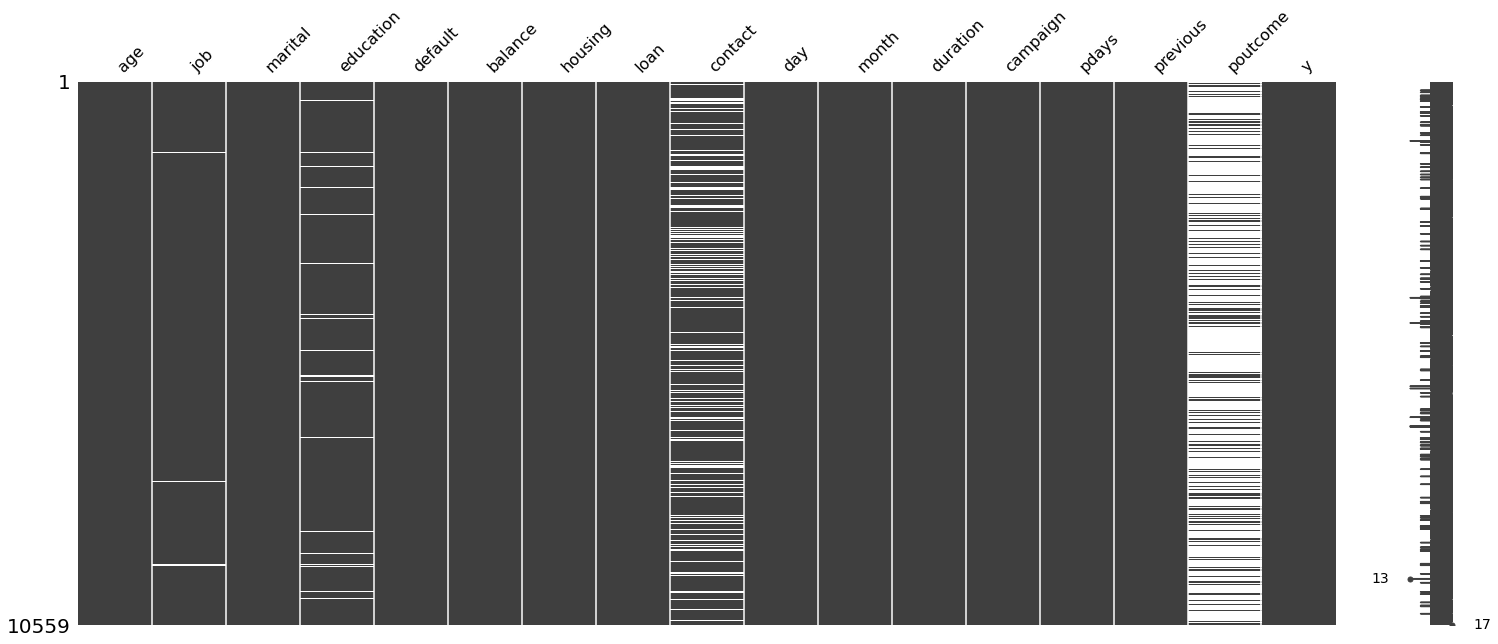

In [12]:
missingno.matrix(df,figsize=(25,10))

In [13]:
df.isnull().sum()

age             0
job            67
marital         0
education     459
default         0
balance         0
housing         0
loan            0
contact      2193
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     7849
y               0
dtype: int64

In [14]:
new_df = df
new_df = new_df.drop(['poutcome','contact'],axis=1)
new_df = new_df.dropna()
new_df = new_df.reset_index(drop=True)

In [15]:
df_bin = pd.DataFrame()
df_bin['job'] = new_df['job']
df_bin['marital'] = new_df['marital']
df_bin['education'] = new_df['education']
df_bin['default'] = new_df['default']
df_bin['housing'] = new_df['housing']
df_bin['loan'] = new_df['loan']
df_bin['y'] = new_df['y']

In [16]:
df_bin

,job,marital,education,default,housing,loan,y
0,housemaid,married,primary,no,no,no,no
1,management,divorced,tertiary,no,yes,no,no
2,blue-collar,married,secondary,no,yes,no,yes
3,technician,single,secondary,no,no,no,no
4,technician,married,secondary,no,no,yes,no
...,...,...,...,...,...,...,...
10058,services,married,secondary,no,no,no,no
10059,technician,married,secondary,no,no,no,no
10060,management,single,tertiary,no,no,no,yes
10061,management,divorced,tertiary,no,no,no,no


In [17]:
ordinal_encoder = OrdinalEncoder()
df_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_bin),columns=list(df_bin.columns))
df_encoded

,job,marital,education,default,housing,loan,y
0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,2.0,0.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0,1.0,0.0,1.0
3,9.0,2.0,1.0,0.0,0.0,0.0,0.0
4,9.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
10058,7.0,1.0,1.0,0.0,0.0,0.0,0.0
10059,9.0,1.0,1.0,0.0,0.0,0.0,0.0
10060,4.0,2.0,2.0,0.0,0.0,0.0,1.0
10061,4.0,0.0,2.0,0.0,0.0,0.0,0.0


In [18]:
ordinal_encoder.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [19]:
df_con = new_df
df_con = df_con.drop(['job','marital','education','default','housing','loan','month','y'],axis=1)

In [20]:
df_con

,age,balance,day,duration,campaign,pdays,previous
0,83,2140,6,109,3,276,8
1,45,6542,13,93,4,-1,0
2,36,4438,20,446,1,-1,0
3,30,5,19,120,6,-1,0
4,27,241,26,889,1,-1,0
...,...,...,...,...,...,...,...
10058,35,8412,9,479,4,-1,0
10059,39,328,6,188,7,-1,0
10060,30,5359,27,119,1,98,1
10061,50,30,20,76,2,-1,0


In [21]:
whole_df = df_con
whole_df['job'] = df_encoded['job']
whole_df['marital'] = df_encoded['marital']
whole_df['education'] = df_encoded['education']
whole_df['default'] = df_encoded['default']
whole_df['housing'] = df_encoded['housing']
whole_df['loan'] = df_encoded['loan']
whole_df['y'] = df_encoded['y']

In [22]:
whole_df

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,y
0,83,2140,6,109,3,276,8,3.0,1.0,0.0,0.0,0.0,0.0,0.0
1,45,6542,13,93,4,-1,0,4.0,0.0,2.0,0.0,1.0,0.0,0.0
2,36,4438,20,446,1,-1,0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
3,30,5,19,120,6,-1,0,9.0,2.0,1.0,0.0,0.0,0.0,0.0
4,27,241,26,889,1,-1,0,9.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10058,35,8412,9,479,4,-1,0,7.0,1.0,1.0,0.0,0.0,0.0,0.0
10059,39,328,6,188,7,-1,0,9.0,1.0,1.0,0.0,0.0,0.0,0.0
10060,30,5359,27,119,1,98,1,4.0,2.0,2.0,0.0,0.0,0.0,1.0
10061,50,30,20,76,2,-1,0,4.0,0.0,2.0,0.0,0.0,0.0,0.0


In [23]:
corr_matrix = whole_df.corr()
corr_matrix['y'].sort_values(ascending=True)

housing     -0.209475
campaign    -0.133751
loan        -0.118245
day         -0.046764
default     -0.037797
age          0.038973
marital      0.063857
job          0.066137
previous     0.085486
balance      0.087287
education    0.116835
pdays        0.151080
duration     0.444438
y            1.000000
Name: y, dtype: float64

In [24]:
train_set,test_set = train_test_split(whole_df,test_size=0.2,random_state=42)

In [25]:
y_train = train_set['y']
x_train = train_set.drop(['y'],axis=1)
y_train_one = (y_train == 1.0)
y_test = test_set['y']
x_test = test_set.drop(['y'],axis=1)
y_test_one = (y_test == 1.0)

In [26]:
prediction = {'Model':[],'Accuracy Score':[],'F1 Score':[]}
prediction_df = pd.DataFrame(prediction)

## Logistic Regression

In [27]:
lr_clf = LogisticRegression(solver='lbfgs',max_iter=3500,random_state=42)
lr_clf.fit(x_train,y_train)

LogisticRegression(max_iter=3500, random_state=42)

## Logistic Regresion Train Prediction


In [28]:
y_train_pred = cross_val_predict(lr_clf,x_train,y_train,cv=3)

In [29]:
confusion_matrix(y_train_one,y_train_pred)

array([[3200,  834],
       [ 913, 3103]], dtype=int64)

In [30]:
precision_score(y_train_one,y_train_pred)

0.7881635763271526

In [31]:
recall_score(y_train_one,y_train_pred)

0.7726593625498008

In [32]:
f1_score(y_train_one,y_train_pred)

0.7803344649817678

## Logistic Regression Test Prediction

In [33]:
y_test_pred = lr_clf.predict(x_test)
print(accuracy_score(y_test,y_test_pred))
a = accuracy_score(y_test,y_test_pred)

0.7878787878787878


In [34]:
confusion_matrix(y_test_one,y_test_pred)

array([[803, 205],
       [222, 783]], dtype=int64)

In [35]:
precision_score(y_test_one,y_test_pred)

0.7925101214574899

In [36]:
recall_score(y_test_one,y_test_pred)

0.7791044776119403

In [37]:
print(f1_score(y_test_one,y_test_pred))
f = f1_score(y_test_one,y_test_pred)
log_reg_score = {'Model':lr_clf.__class__.__name__,'Accuracy Score':a,'F1 Score':f}
prediction_df = prediction_df.append(log_reg_score,ignore_index=True,)

0.7857501254390367


## Decision Trees

In [38]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
y_pred = tree_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.734227521112767

In [40]:
params={'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4]}
tree_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),params,verbose=1,cv=3)
tree_grid_search_cv.fit(x_train,y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [41]:
tree_grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=34, random_state=42)

In [42]:
y_pred = tree_grid_search_cv.predict(x_test)
print(accuracy_score(y_test,y_pred))
a = accuracy_score(y_test,y_pred)

0.8107302533532041


In [43]:
confusion_matrix(y_test_one,y_pred)

array([[800, 208],
       [173, 832]], dtype=int64)

In [44]:
precision_score(y_test_one,y_pred)

0.8

In [45]:
recall_score(y_test_one,y_test_pred)

0.7791044776119403

In [46]:
print(f1_score(y_test_one,y_pred))
f = f1_score(y_test_one,y_pred)
tree_score = {'Model':'Decision Tree','Accuracy Score':a,'F1 Score':f}
prediction_df = prediction_df.append(tree_score,ignore_index=True)

0.8136919315403423


## Bagging Classifier

In [47]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1)
bag_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [48]:
y_pred = bag_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
a = accuracy_score(y_test,y_pred)

0.8092399403874814


In [49]:
confusion_matrix(y_test_one,y_pred)

array([[802, 206],
       [178, 827]], dtype=int64)

In [50]:
precision_score(y_test_one,y_pred)

0.8005808325266215

In [51]:
recall_score(y_test_one,y_test_pred)

0.7791044776119403

In [52]:
print(f1_score(y_test_one,y_pred))
f = f1_score(y_test_one,y_pred)
bag_score = {'Model':bag_clf.__class__.__name__,'Accuracy Score':a,'F1 Score':f}
prediction_df = prediction_df.append(bag_score,ignore_index=True)

0.8115799803729147


## Random Forest

In [53]:
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(x_train,y_train)
y_pred = rnd_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.812220566318927

In [54]:
params={'n_estimators':list(range(30,100))}
rnd_grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42,n_jobs=-1),params,verbose=1,cv=3)
rnd_grid_search_cv.fit(x_train,y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'n_estimators': [30, 31, 32, 33, 34, 35, 36, 37, 38,
                                          39, 40, 41, 42, 43, 44, 45, 46, 47,
                                          48, 49, 50, 51, 52, 53, 54, 55, 56,
                                          57, 58, 59, ...]},
             verbose=1)

In [55]:
rnd_grid_search_cv.best_estimator_

RandomForestClassifier(n_estimators=83, n_jobs=-1, random_state=42)

In [56]:
y_pred = rnd_grid_search_cv.predict(x_test)
print(accuracy_score(y_test,y_pred))
a = accuracy_score(y_test,y_pred)

0.8137108792846498


In [57]:
confusion_matrix(y_test_one,y_pred)

array([[792, 216],
       [159, 846]], dtype=int64)

In [58]:
precision_score(y_test_one,y_pred)

0.7966101694915254

In [59]:
recall_score(y_test_one,y_test_pred)

0.7791044776119403

In [60]:
print(f1_score(y_test_one,y_pred))
f = f1_score(y_test_one,y_pred)
random_score = {'Model':'Random Forest','Accuracy Score':a,'F1 Score':f}
prediction_df = prediction_df.append(random_score,ignore_index=True)

0.818577648766328


## Voting Classifier

In [61]:
voting_clf = VotingClassifier(
    estimators=[('lr',lr_clf),('tree',tree_grid_search_cv),('rnd',rnd_grid_search_cv),('bag',bag_clf)],
    voting='soft')

In [62]:
voting_clf.fit(x_train,y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits
Fitting 3 folds for each of 70 candidates, totalling 210 fits


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=3500,
                                                 random_state=42)),
                             ('tree',
                              GridSearchCV(cv=3,
                                           estimator=DecisionTreeClassifier(random_state=42),
                                           param_grid={'max_leaf_nodes': [2, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8, 9,
                                                                          10,
                                                                          11,
                                                                          12,
                                                                          13,
                   

In [63]:
y_pred = voting_clf.predict(x_test)
print(voting_clf.__class__.__name__,accuracy_score(y_test,y_pred))
a = accuracy_score(y_test,y_pred)

VotingClassifier 0.8191753601589667


In [64]:
confusion_matrix(y_test_one,y_pred)

array([[799, 209],
       [155, 850]], dtype=int64)

In [65]:
precision_score(y_test_one,y_pred)

0.8026440037771483

In [66]:
recall_score(y_test_one,y_test_pred)

0.7791044776119403

In [67]:
print(f1_score(y_test_one,y_pred))
f = f1_score(y_test_one,y_pred)
voting_score = {'Model':voting_clf.__class__.__name__,'Accuracy Score':a,'F1 Score':f}
prediction_df = prediction_df.append(voting_score,ignore_index=True)

0.8236434108527133


## AdaBoostClassifier

In [68]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),n_estimators=400,algorithm='SAMME.R',learning_rate=0.5)

In [69]:
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=400)

In [70]:
y_pred = ada_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
a = accuracy_score(y_test,y_pred)

0.8057625434674615


C:\Dev\Learning\env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [71]:
confusion_matrix(y_test_one,y_pred)

array([[814, 194],
       [197, 808]], dtype=int64)

In [72]:
precision_score(y_test_one,y_pred)

0.8063872255489022

In [73]:
recall_score(y_test_one,y_test_pred)

0.7791044776119403

In [74]:
print(f1_score(y_test_one,y_pred))
f = f1_score(y_test_one,y_pred)
ada_score = {'Model':ada_clf.__class__.__name__,'Accuracy Score':a,'F1 Score':f}
prediction_df = prediction_df.append(ada_score,ignore_index=True)

0.8051818634778275


In [75]:
prediction_df

,Model,Accuracy Score,F1 Score
0,LogisticRegression,0.787879,0.785750
1,Decision Tree,0.810730,0.813692
2,BaggingClassifier,0.809240,0.811580
3,Random Forest,0.813711,0.818578
4,VotingClassifier,0.819175,0.823643
5,AdaBoostClassifier,0.805763,0.805182


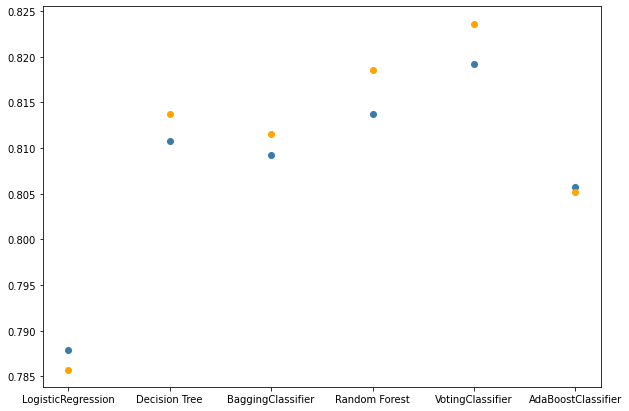

In [81]:
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(prediction_df['Model'],prediction_df['Accuracy Score'],'o',color='#3c7aaa')
ax.plot(prediction_df['Model'],prediction_df['F1 Score'],'o',color='orange')